# Introduction Machine Learning

We will use the python package scikit-learn to implement and explore fundamental aspects of machine learning

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is designed to give access to **well-known** machine learning algorithms within Python code, via API. 

Scikit-Learn is built on Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) packages, they enable efficient in-core numerical and scientific computation within Python (read: a nice interface to a lot of C/C++ :) )

## What is Machine Learning?

Machine Learning is essentially building programs with **tunable parameters** (most commonly represented as an array of floating point numbers) that are adjusted automatically by the program itself to improve by **adapting to previously seen data.**

Machine Learning is a subfield of **Artificial Intelligence**.  Machine Learning algorithms are building blocks that allow computers to behave more intelligently by **generalizing** as opposed to storing and retrieving data items like a database driven system would do.

As a place to start - two very simple machine learning tasks:
1. The first is a **classification** task

In [17]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [18]:
#display(Image(filename='images/classification.png'))
#print("Binary Classification")

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

(-1.5, 31.5, 0.29193570675654645, 16.660075112297925)

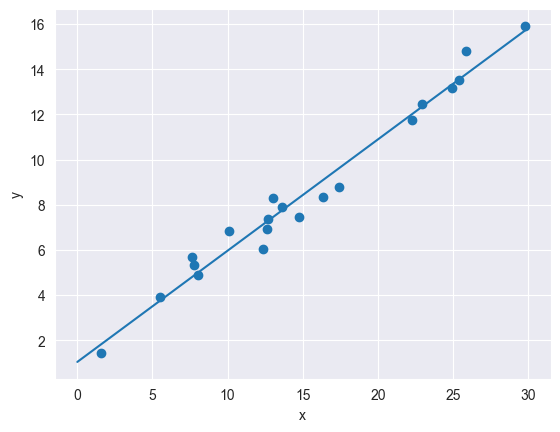

In [19]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

# create a linear regression classifier
clf = LinearRegression()
clf.fit(x[:, None], y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

In [20]:
print(x[:, None])
print (x)

[[12.65604756]
 [24.9064752 ]
 [22.28151627]
 [29.78117583]
 [13.00456049]
 [14.77500544]
 [25.41207286]
 [25.88285562]
 [16.337112  ]
 [12.60416256]
 [ 8.04058428]
 [12.34734724]
 [17.42966631]
 [ 1.54490279]
 [ 5.51194806]
 [ 7.78425332]
 [22.95847233]
 [10.07421589]
 [ 7.63920221]
 [13.64152263]]
[12.65604756 24.9064752  22.28151627 29.78117583 13.00456049 14.77500544
 25.41207286 25.88285562 16.337112   12.60416256  8.04058428 12.34734724
 17.42966631  1.54490279  5.51194806  7.78425332 22.95847233 10.07421589
  7.63920221 13.64152263]


The model has been **learned** from the training data, and can be used to predict the result of test data: here, we might be given an x-value, and the model would allow us to predict the y value.

## Representation of Data in Scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional(e.g. millions of features).

![Data Layout](images/data-layout.png)

## A Simple Example: the Iris Dataset

A classic example of a simple classification dataset. The data consists of measurements of three different species of irises. There are three species of iris in the dataset, which we can picture here:

/var/folders/r0/6jmmwyrj56123vb9rjqcjc6r0000gn/T/ipykernel_42566/2149753793.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


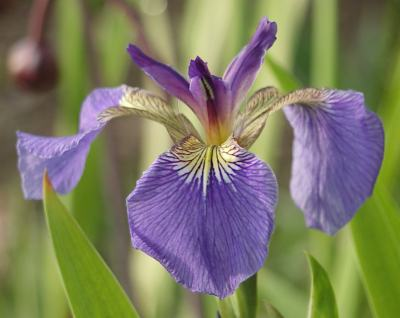

Iris Setosa



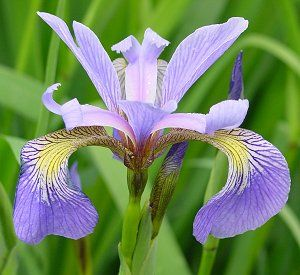

Iris Versicolor



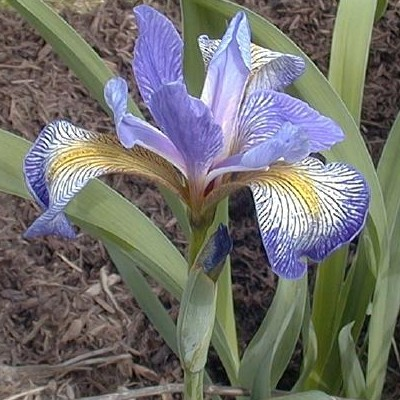

Iris Virginica


In [21]:
from IPython.core.display import Image, display
display(Image(filename='/Users/tejaspatel/IdeaProjects/AI-class-practice/images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='/Users/tejaspatel/IdeaProjects/AI-class-practice/images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='/Users/tejaspatel/IdeaProjects/AI-class-practice/images/iris_virginica.jpg'))
print("Iris Virginica")

### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

### Loading the Iris Data with Scikit-Learn

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  


In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [25]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [26]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

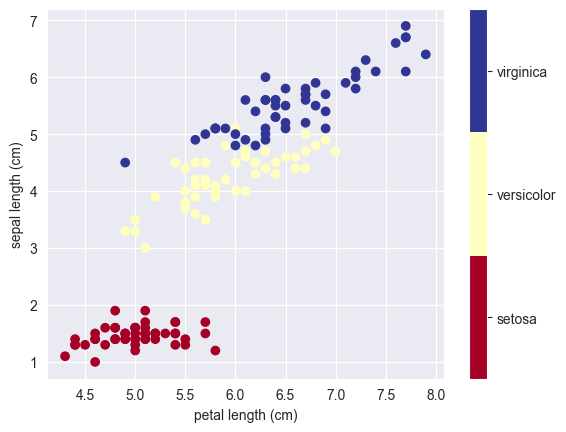

In [39]:
import matplotlib.pyplot as plt

x_index = 0
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[y_index])
plt.ylabel(iris.feature_names[x_index]);

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Other Available Data

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.

In [29]:
from sklearn import datasets

In [30]:
# Type datasets.fetch_<TAB> or datasets.load_<TAB> in IPython to see all possibilities
# datasets.fetch_

In [31]:
# datasets.load_

## Linear Regression in Python using Statsmodels

## An Example (with the Dataset to be used)
For illustration purposes, let’s suppose that you have a fictitious economy with the following parameters, where the index_price is the dependent variable, and the 2 independent/input variables are:

interest_rate
unemployment_rate
We will use Pandas DataFrame to capture the data in Python:

In [32]:
import pandas as pd

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data)
print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

In [33]:
import pandas as pd
import statsmodels.api as sm

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data) 

x = df[['interest_rate','unemployment_rate']]
y = df['index_price']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           4.04e-11
Time:                        11:32:49   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

This is the result that you’ll get once you run the code in Python:

## Interpreting the Regression Results
Highlighted (in yellow above) several important components within the results:

$1$ - Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

$2$ - const coefficient is your Y-intercept. It means that if both the interest_rate and unemployment_rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.

$3$- interest_rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)

$4$- unemployment_rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
$5$- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.

$6$- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)
You may want to check the following tutorial that includes an example of multiple linear regression using both sklearn and statsmodels.

For further information about statsmodels, please refer to the statsmodels documentation.

## there is a relationship between head size and brain weight?
To access the CSV file on the pride space

In [34]:
ds=pd.read_csv("/Users/tejaspatel/IdeaProjects/AI-class-practice/data/headbrain11.csv")

ds.head()
df = pd.DataFrame(ds)

x = df[['Head Size(cm^3)']]
y = df['Brain Weight(grams)']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Brain Weight(grams)   R-squared:                       0.639
Model:                             OLS   Adj. R-squared:                  0.638
Method:                  Least Squares   F-statistic:                     416.5
Date:                 Wed, 21 Sep 2022   Prob (F-statistic):           5.96e-54
Time:                         11:32:49   Log-Likelihood:                -1350.3
No. Observations:                  237   AIC:                             2705.
Df Residuals:                      235   BIC:                             2711.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             325.5734     4